In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def parse_file(file_path, evals_name):
    df = pd.read_csv(file_path, sep=',', header=None, names=evals_name)
    for name in evals_name:
        df[name] = [float(item.replace(name+'=', '')) for item in df[name]]
    return df

In [3]:
evals_name = 'ACC=, f1_macro=, precision_macro=, recall_macro=, f1_micro=, precision_micro=, recall_micro=, NMI=, ADJ_RAND_SCORE='.strip('=').split('=, ')
path_1 = 'recoder_clustering_cora_arga_cvae_iter200_effect_of_distribution.txt'

df1 = parse_file(path_1, evals_name)

In [4]:
%matplotlib inline

# visualize the effect of \#distributions

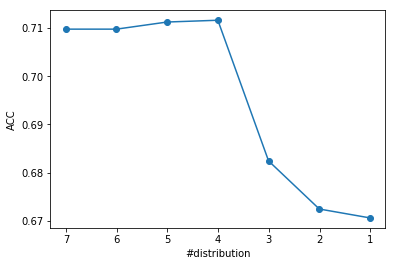

In [5]:
s = df1.iloc[199::200,:]
s['ARI'] = s['ADJ_RAND_SCORE']
ax = s.iloc[:,0].plot.line(style='o-')
ax.set_xticklabels(['', '7', '6', '5', '4', '3', '2', '1'])
ax.set_ylabel('ACC')
ax.set_xlabel('#distribution')
fig = ax.get_figure()
fig.savefig('effect_of_distribution.pdf', bbox_inches='tight')

# visualize the effect of \#iterations

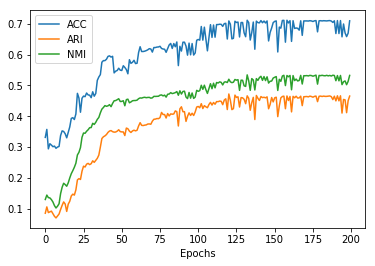

In [6]:
s = df1.iloc[0:200:1, :]
s['ARI'] = s['ADJ_RAND_SCORE']
ax = s[['ACC', 'ARI', 'NMI']].plot.line(style='-')
# ax.set_xticklabels(['', '7', '6', '5', '4', '3', '2', '1'])
# ax.set_ylabel('ACC.')
ax.set_xlabel('Epochs')
fig = ax.get_figure()
fig.savefig('effect_of_epochs.pdf', bbox_inches='tight')

# visualize the mean/std curve with shadow, testing

In [7]:
table = df1.iloc[:,0].values.reshape(200, 7, order='F')


In [8]:
# pd.DataFrame(table)

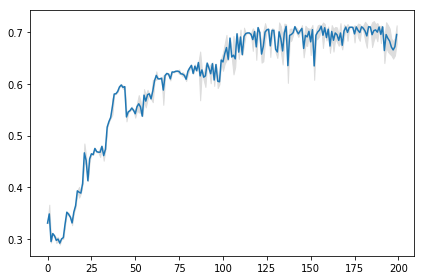

In [9]:
mean = np.mean(table, axis = 1)
std = np.std(table, axis = 1)
size = np.arange(0,200)

plt.plot(size, mean, '-', label="Training score")
plt.fill_between(size, mean - std, mean + std, color='#DDDDDD')
plt.tight_layout()
plt.show()

In [10]:
path_2 = 'recoder_clustering_cora_arga_cvae_iter200_effect_of_dimension.txt'
df2 = parse_file(path_2, evals_name)
s = df2.iloc[199::200,:]

In [11]:
s

,ACC,f1_macro,precision_macro,recall_macro,f1_micro,precision_micro,recall_micro,NMI,ADJ_RAND_SCORE
199,0.394387,0.352558,0.358936,0.384895,0.394387,0.394387,0.394387,0.273886,0.165092
399,0.488922,0.421544,0.433134,0.442831,0.488922,0.488922,0.488922,0.355304,0.279206
599,0.690547,0.650705,0.660529,0.671299,0.690547,0.690547,0.690547,0.491456,0.449787
799,0.660266,0.615583,0.618605,0.635643,0.660266,0.660266,0.660266,0.488192,0.419929
999,0.712703,0.674009,0.756744,0.693429,0.712703,0.712703,0.712703,0.536445,0.471176
1199,0.732275,0.692505,0.782258,0.705567,0.732275,0.732275,0.732275,0.553800,0.494491
1399,0.693501,0.632973,0.646299,0.645895,0.693501,0.693501,0.693501,0.560102,0.517664
1599,0.650665,0.545083,0.606919,0.573461,0.650665,0.650665,0.650665,0.519954,0.452921


In [12]:
s['ARI'] = s['ADJ_RAND_SCORE']

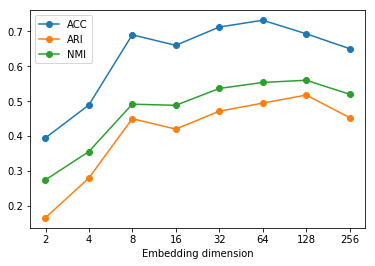

In [13]:
ax = s[['ACC', 'ARI', 'NMI']].plot.line(style='o-')
ax.set_xticklabels(['', '2', '4', '8', '16', '32', '64', '128', '256'])
# ax.set_ylabel('ACC.')
ax.set_xlabel('Embedding dimension')
fig = ax.get_figure()
fig.savefig('effect_of_dimension.pdf', bbox_inches='tight')

In [14]:
path_3 = 'recoder_clustering_cora_vgc_iter200_balance.txt'
df3 = parse_file(path_3, evals_name)
s = df3.iloc[199::200,:]

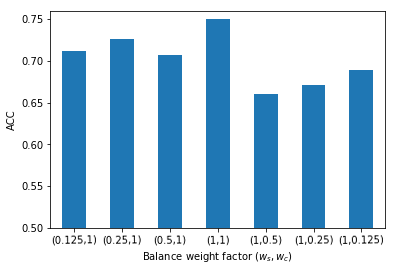

In [16]:
s['ARI'] = s['ADJ_RAND_SCORE']
ax = s[['ACC']].plot.bar(rot=1, legend=False, width=0.5)
# ax.set_ylabel('ACC.')
ax.set_ylim(0.5,0.76)
ax.set_xlabel(r'Balance weight factor ($w_s, w_c$)')
ax.set_xticklabels(['(0.125,1)','(0.25,1)','(0.5,1)','(1,1)','(1,0.5)','(1,0.25)','(1,0.125)'])
ax.set_ylabel('ACC')
fig = ax.get_figure()
fig.savefig('balance.pdf', bbox_inches='tight')